# **EDA** - 🇮🇳 Indian Travel Dataset

In [1]:
# Packages
# Data Processing
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
# Statistics
import math
from scipy import stats
from scipy.stats import norm
# File Path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv


In [2]:
# version check
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

numpy version: 1.26.3
pandas version: 2.2.0


In [3]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
# setting
path_root = "/kaggle/input/"
seed = 394

In [5]:
# pandas display setting
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 200)

In [6]:
df_travel = pd.read_csv(path_root + "travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv")

# 1. Overview

In [7]:
df_travel.shape

(325, 16)

In [8]:
display(df_travel.head())
display(df_travel.tail())

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
320,320,Western,Gujarat,Gandhinagar,Akshardham,Temple,1992,3.0,4.6,0,Yes,Monday,Religious,No,0.18,All
321,321,Central,Uttar Pradesh,Agra,Agra Fort,Fort,1565,2.0,4.5,40,Yes,NaN,Historical,Yes,1.30,Afternoon
322,322,Central,Madhya Pradesh,Bhopal,Madhya Pradesh Tribal Museum,Museum,2013,2.0,4.7,10,Yes,Monday,Cultural,Yes,0.15,All
323,323,Northern,Rajasthan,Jaipur,City Palace,Palace,1727,2.0,4.4,200,Yes,NaN,Historical,Yes,0.51,Morning
324,324,Northern,Rajasthan,Jaipur,Albert Hall Museum,Museum,1887,2.0,4.5,200,Yes,NaN,Historical,Yes,0.63,All


In [9]:
df_travel.columns

Index(['Unnamed: 0', 'Zone', 'State', 'City', 'Name', 'Type',
       'Establishment Year', 'time needed to visit in hrs',
       'Google review rating', 'Entrance Fee in INR',
       'Airport with 50km Radius', 'Weekly Off', 'Significance',
       'DSLR Allowed', 'Number of google review in lakhs',
       'Best Time to visit'],
      dtype='object')

In [10]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        325 non-null    int64  
 1   Zone                              325 non-null    object 
 2   State                             325 non-null    object 
 3   City                              325 non-null    object 
 4   Name                              325 non-null    object 
 5   Type                              325 non-null    object 
 6   Establishment Year                325 non-null    object 
 7   time needed to visit in hrs       325 non-null    float64
 8   Google review rating              325 non-null    float64
 9   Entrance Fee in INR               325 non-null    int64  
 10  Airport with 50km Radius          325 non-null    object 
 11  Weekly Off                        32 non-null     object 
 12  Signific

In [11]:
# categorical features
list_categorical_features = [
    'Zone', 'State', 'City', 'Name', 'Type', 
    'Establishment Year', 'Airport with 50km Radius', 'Weekly Off', 
    'Significance', 'DSLR Allowed', 'Best Time to visit'
]
df_travel[list_categorical_features] = df_travel[list_categorical_features].astype('category')
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Unnamed: 0                        325 non-null    int64   
 1   Zone                              325 non-null    category
 2   State                             325 non-null    category
 3   City                              325 non-null    category
 4   Name                              325 non-null    category
 5   Type                              325 non-null    category
 6   Establishment Year                325 non-null    category
 7   time needed to visit in hrs       325 non-null    float64 
 8   Google review rating              325 non-null    float64 
 9   Entrance Fee in INR               325 non-null    int64   
 10  Airport with 50km Radius          325 non-null    category
 11  Weekly Off                        32 non-null     category

In [12]:
# descriptive statistics
display(df_travel.describe().round(3).T) # numerical
display(df_travel.describe(include = ['object', 'bool', 'category']).T) # categorical

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,325.0,162.000,93.964,0.00,81.000,162.00,243.0,324.0
time needed to visit in hrs,325.0,1.808,0.971,0.50,1.000,1.50,2.0,7.0
Google review rating,325.0,4.486,0.275,1.40,4.400,4.50,4.6,4.9
Entrance Fee in INR,325.0,115.809,530.860,0.00,0.000,0.00,40.0,7500.0
Number of google review in lakhs,325.0,0.408,0.647,0.01,0.059,0.17,0.5,7.4


,count,unique,top,freq
Zone,325,6,Southern,98
State,325,33,Uttar Pradesh,23
City,325,214,Delhi,16
Name,325,321,Thiksey Monastery,2
Type,325,78,Temple,59
Establishment Year,325,162,Unknown,111
Airport with 50km Radius,325,2,Yes,227
Weekly Off,32,5,Monday,23
Significance,325,25,Historical,78
DSLR Allowed,325,2,Yes,265


# 2. Data Cleaning

In [13]:
# subsetting
df_travel = df_travel[[
#     'Unnamed: 0', 
    'Zone', 'State', 'City', 'Name', 'Type',
    'Establishment Year', 'time needed to visit in hrs',
    'Google review rating', 'Entrance Fee in INR',
    'Airport with 50km Radius', 'Weekly Off', 'Significance',
    'DSLR Allowed', 'Number of google review in lakhs',
    'Best Time to visit'
]].copy()

In [14]:
# missing values
df_travel.isnull().sum()

Zone                                  0
State                                 0
City                                  0
Name                                  0
Type                                  0
Establishment Year                    0
time needed to visit in hrs           0
Google review rating                  0
Entrance Fee in INR                   0
Airport with 50km Radius              0
Weekly Off                          293
Significance                          0
DSLR Allowed                          0
Number of google review in lakhs      0
Best Time to visit                    0
dtype: int64

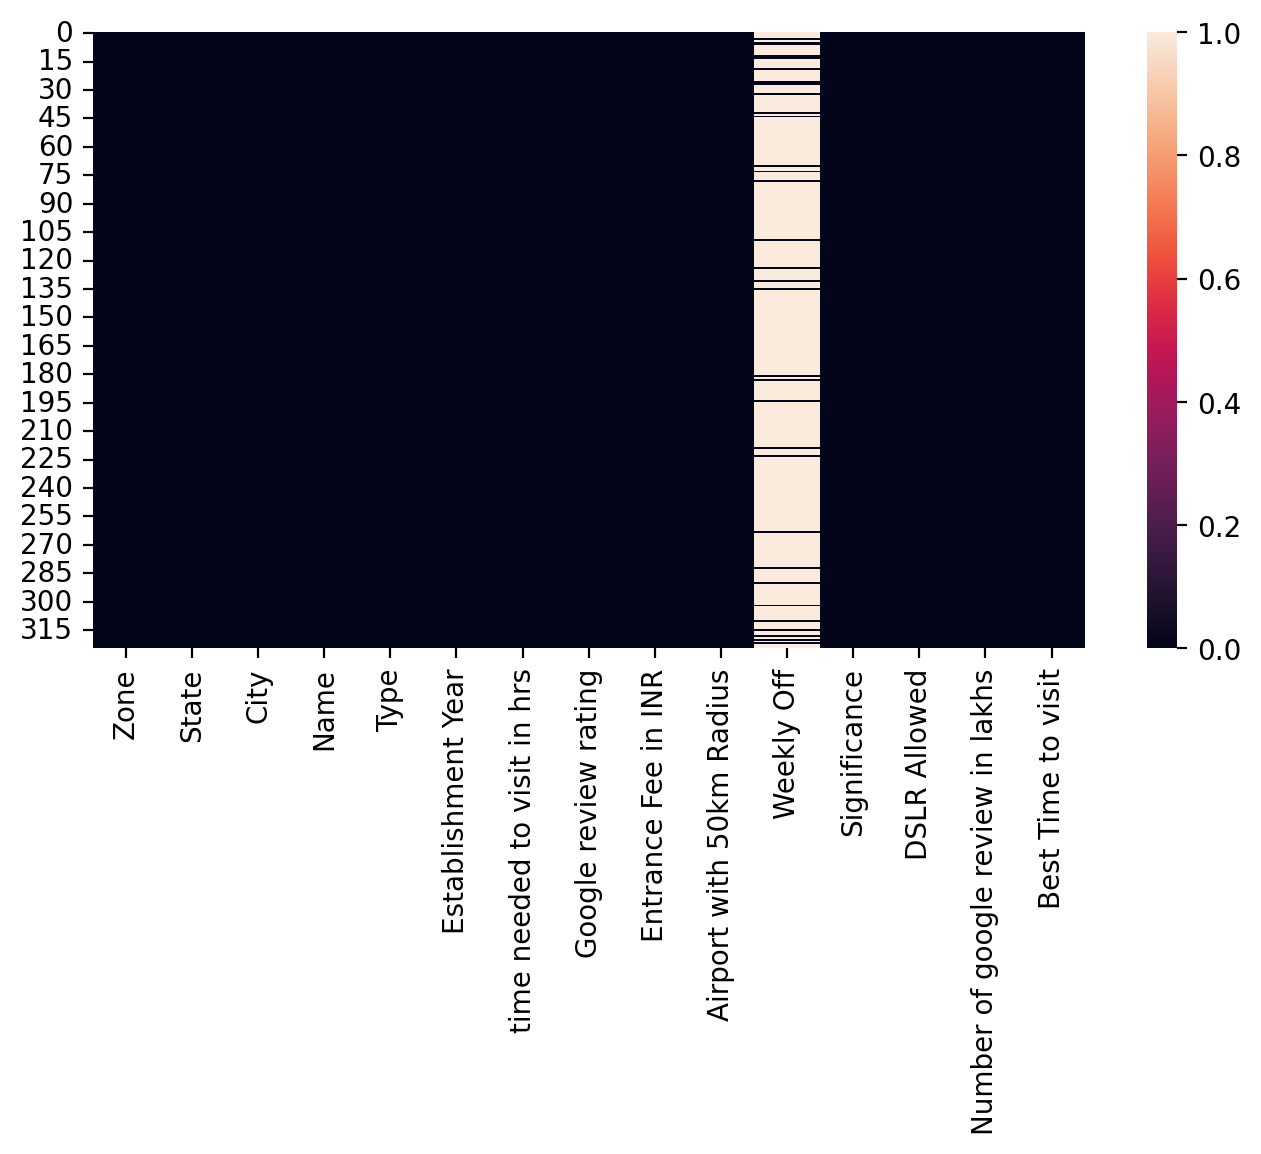

In [15]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(
    df_travel.isnull(), vmin = 0, vmax = 1
)

plt.show()

'Weekly Off' contains so many missing values.

In [16]:
# dropping columns containing missing values
df_travel = df_travel.drop(['Weekly Off'], axis = 1)

In [17]:
# duplicated rows
df_travel.loc[df_travel.duplicated()]

,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit


There are no duplicated rows.

# 3. Univariate Analysis

In [18]:
def summary_numerical_dist(df_data, col, q_min, q_max):
    
    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (2, 2)
    num_subplot = 4
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1), (1, 0), (1, 1)], [1, 1, 1, 1], [1, 1, 1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )

    sns.histplot(data = df_data, x = col, kde = True, ax = axes[0])
    stats.probplot(x = df_data[col], dist = stats.norm, plot = axes[1])
    sns.boxplot(data = df_data, x = col, ax = axes[2])
    pts = df_data[col].quantile(q = np.arange(q_min, q_max, 0.01))
    sns.lineplot(x = pts.index, y = pts, ax = axes[3])
    axes[3].grid(True)

    list_title = ["Histogram", "QQ plot", "Boxplot", "Outlier"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

In [19]:
def summary_categorical_dist(df_data, col):
    
    fig = plt.figure(figsize = (8, 4), facecolor = "white")

    layout_plot = (1, 2)
    num_subplot = 2
    axes = [None for _ in range(num_subplot)]
    list_shape_subplot = [[(0, 0), (0, 1)], [1, 1], [1, 1]]
    for i in range(num_subplot):
        axes[i] = plt.subplot2grid(
            layout_plot, list_shape_subplot[0][i],
            rowspan = list_shape_subplot[1][i],
            colspan = list_shape_subplot[2][i]
        )
    
    count = df_data[col].value_counts().sort_index()
    
    sns.countplot(data = df_data, y = col, order = count.index, ax = axes[0])
    axes[1].pie(data = df_data, x = count, labels = count.index, autopct = '%1.1f%%', startangle = 90)
    
    list_title = ["Counts", "Proportions"]
    for i in range(num_subplot):
        axes[i].set_title(list_title[i])
    plt.suptitle(f"Distribution of: {col}", fontsize = 15)
    plt.tight_layout()
    plt.show()

## 3.1. Numerical

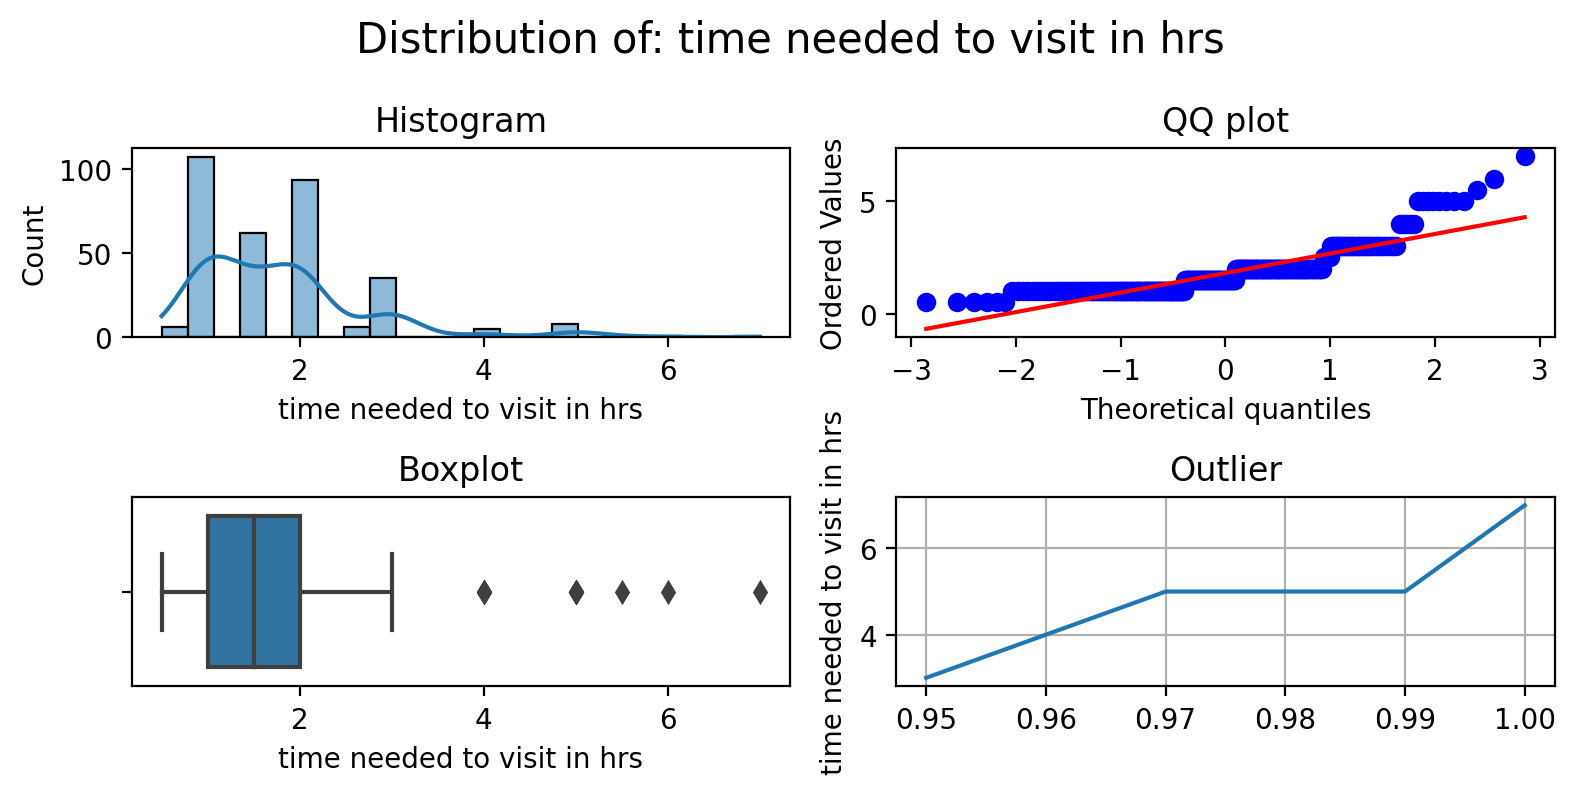

In [20]:
summary_numerical_dist(df_travel, 'time needed to visit in hrs', .95, 1)

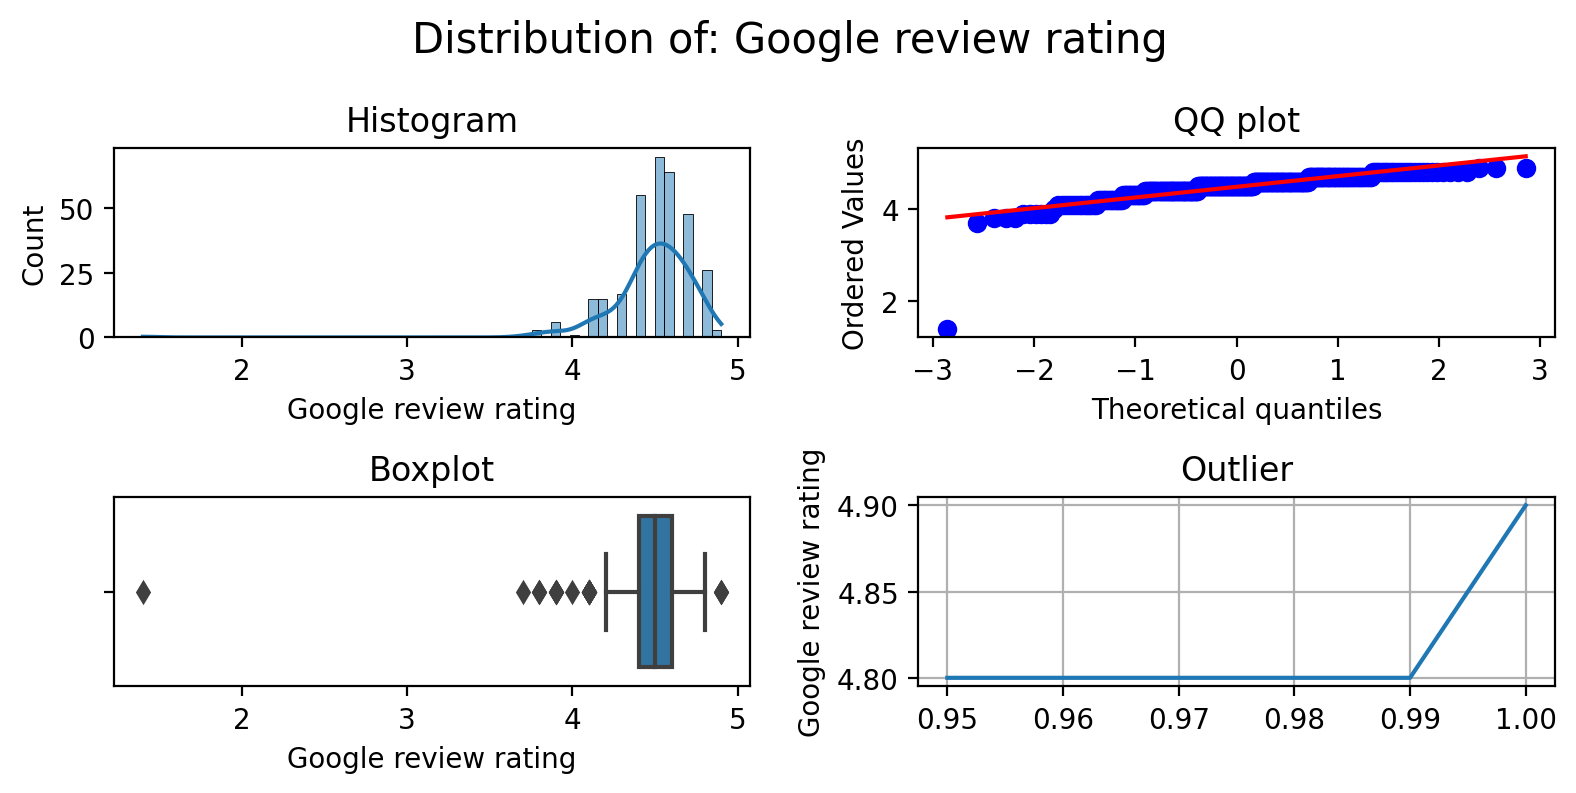

In [21]:
summary_numerical_dist(df_travel, 'Google review rating', .95, 1)

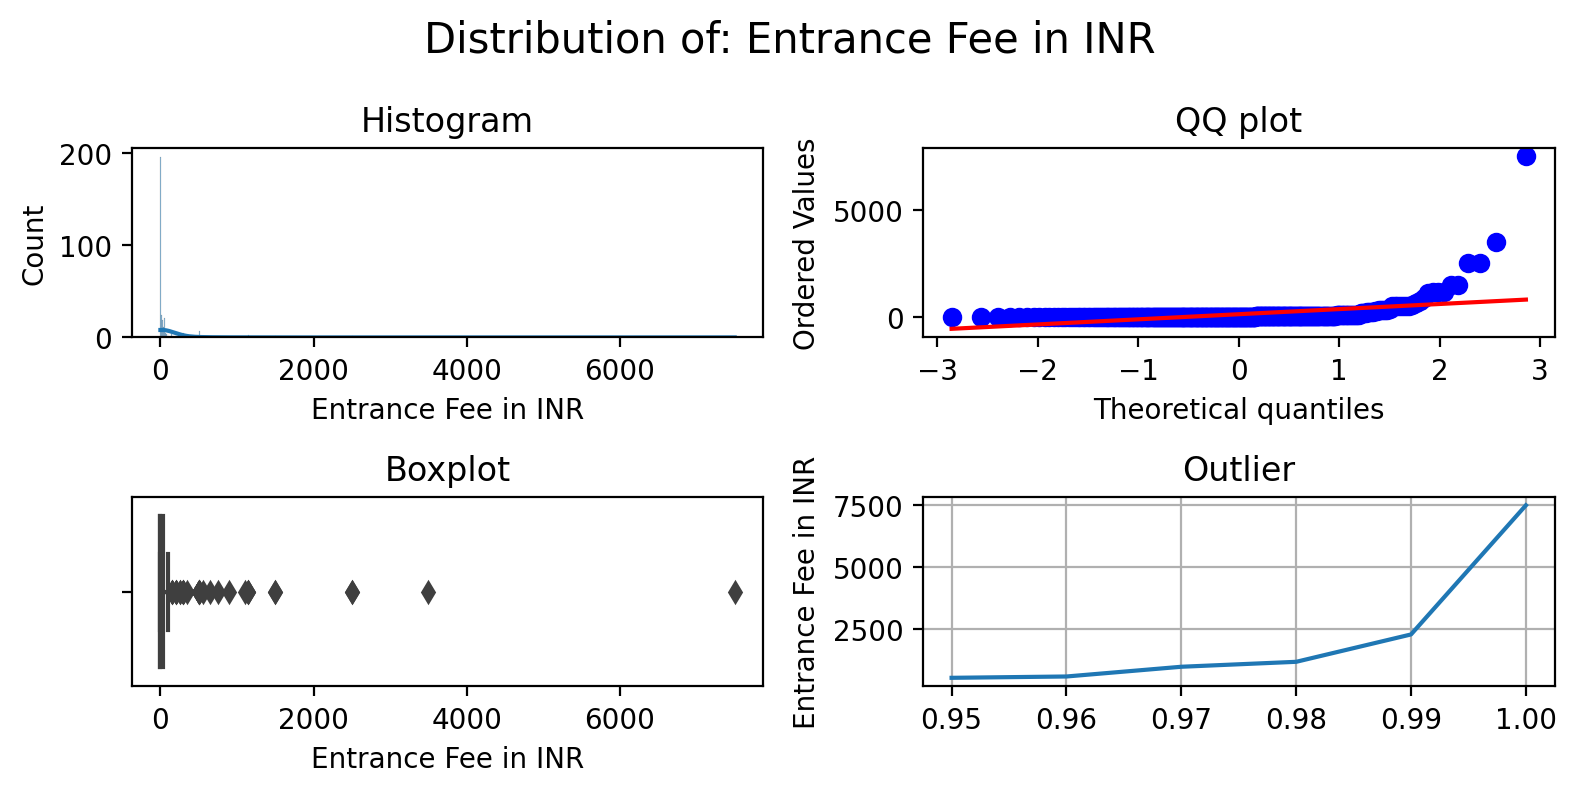

In [22]:
summary_numerical_dist(df_travel, 'Entrance Fee in INR', .95, 1)

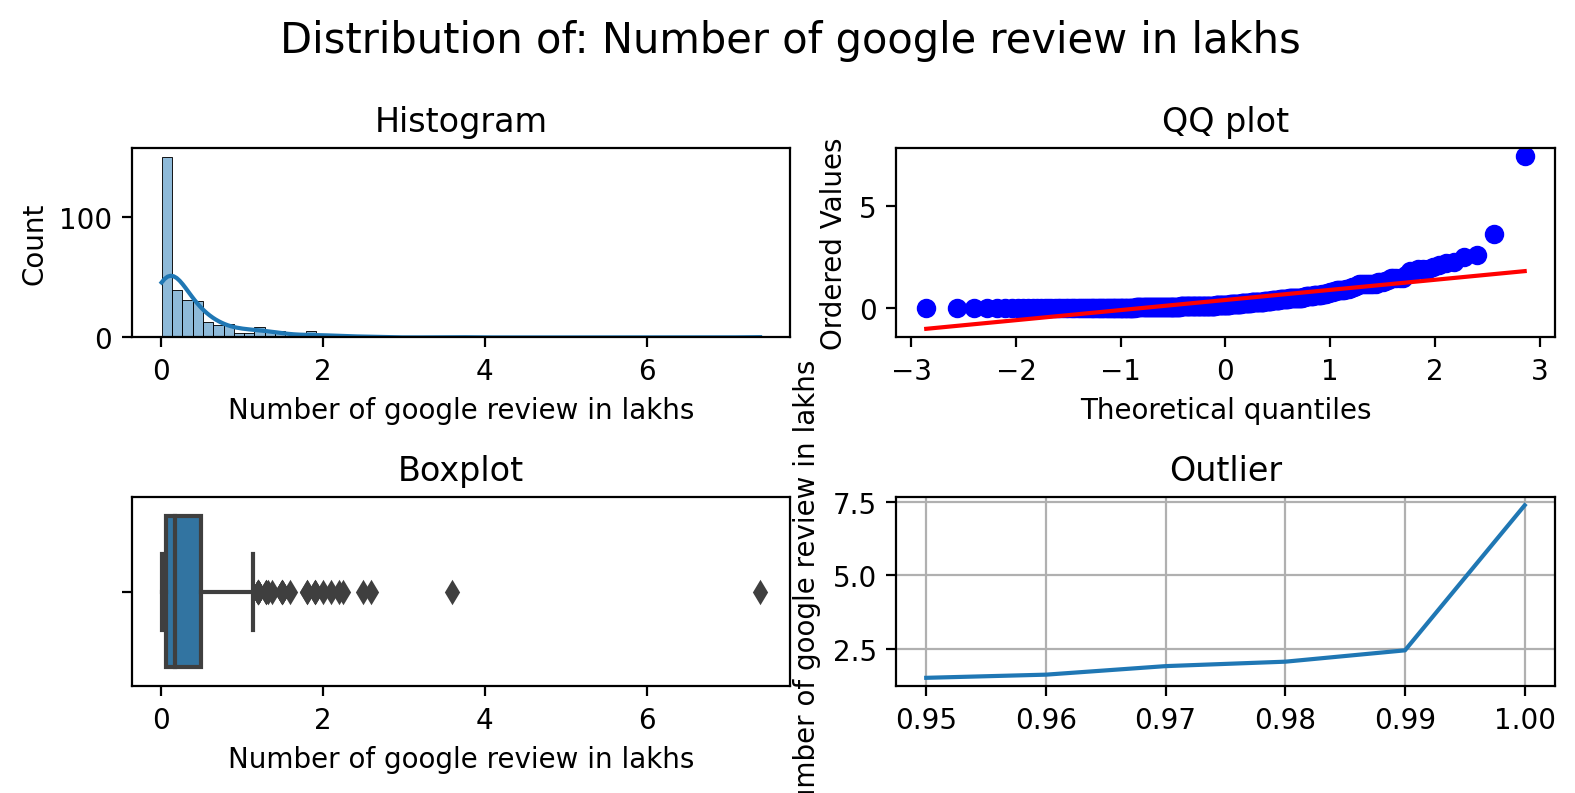

In [23]:
summary_numerical_dist(df_travel, 'Number of google review in lakhs', .95, 1)

## 3.2. Categorical

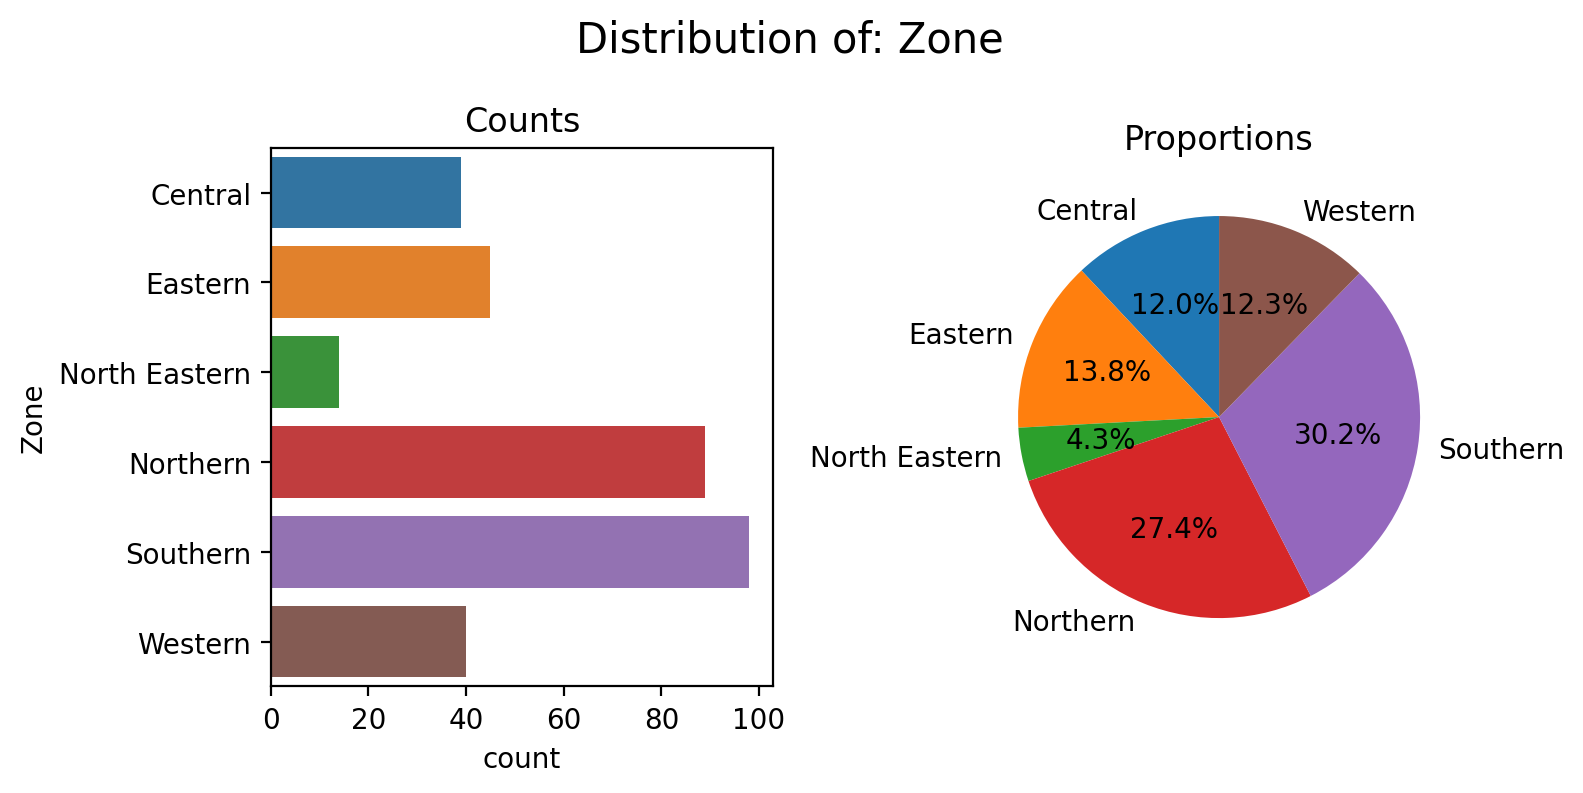

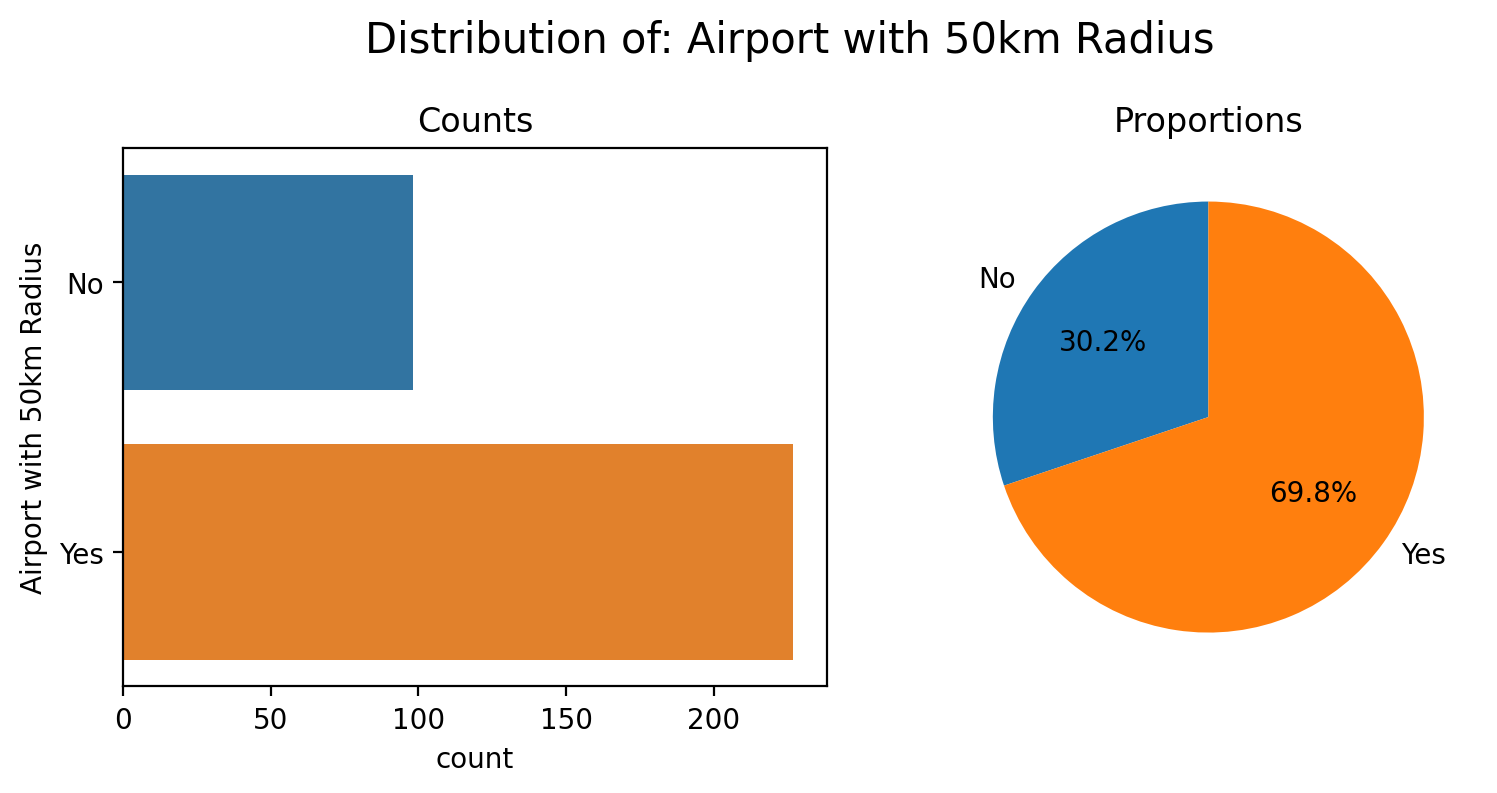

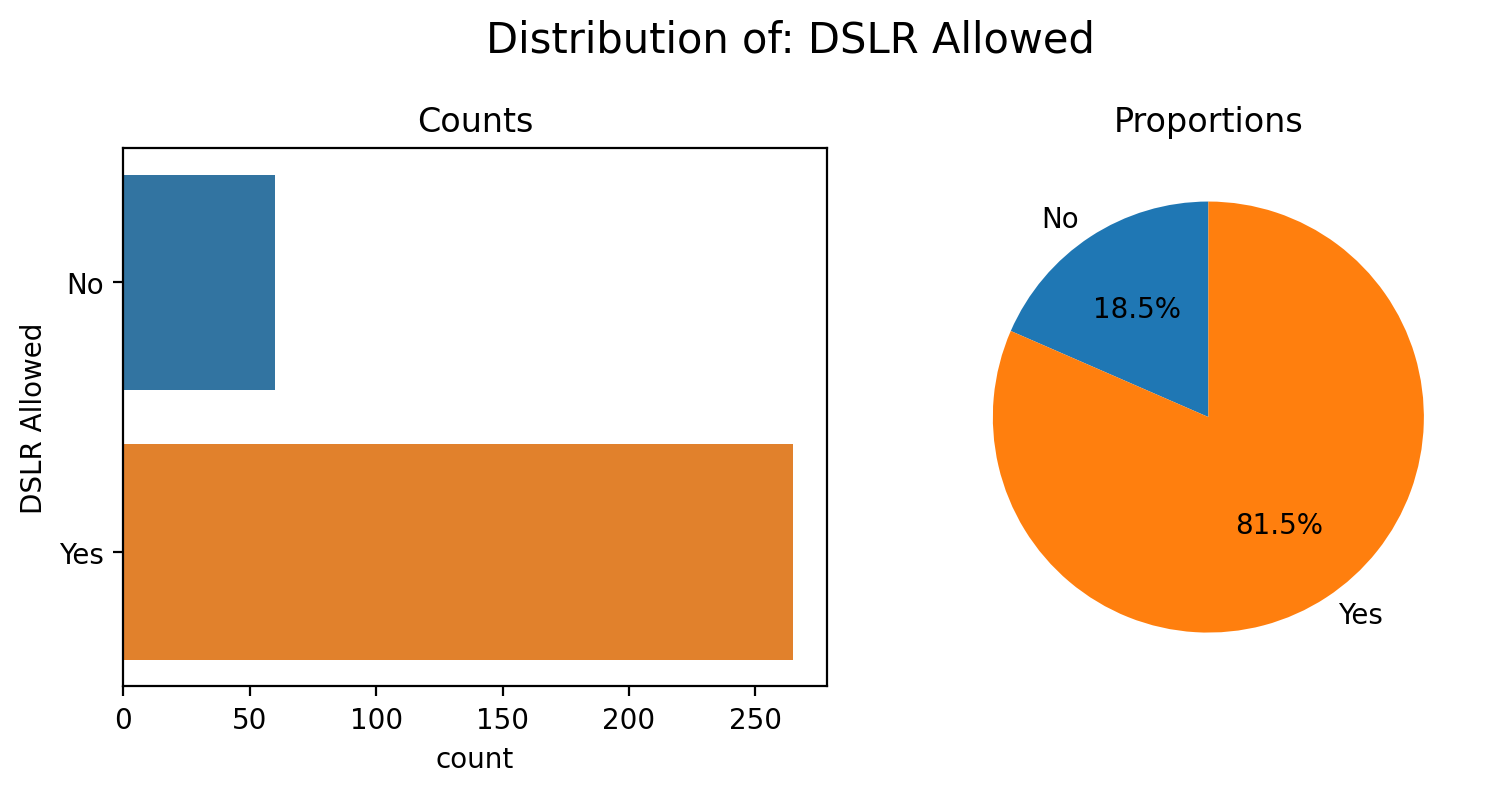

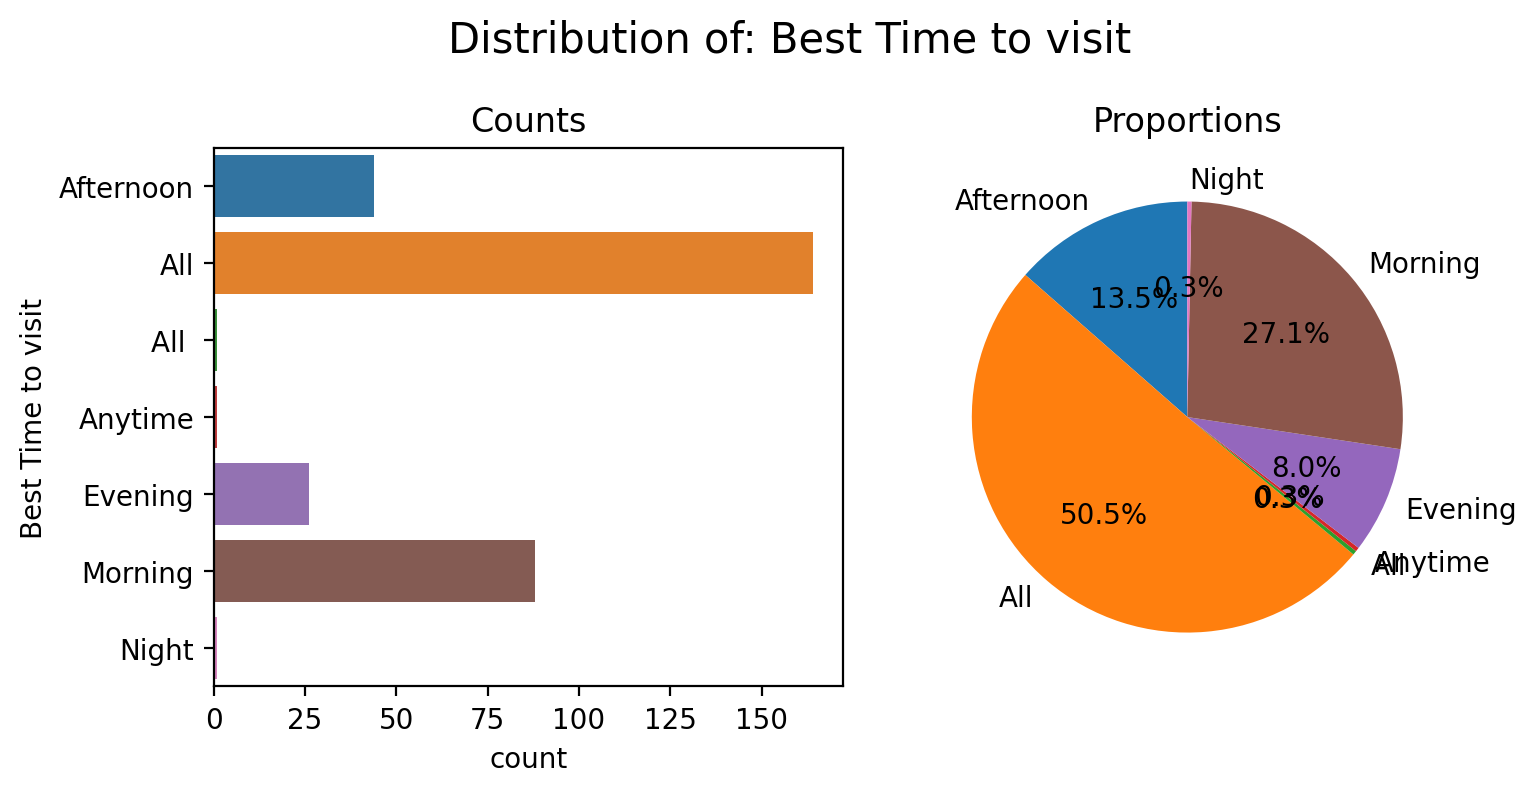

In [24]:
for col in ['Zone', 'Airport with 50km Radius', 'DSLR Allowed', 'Best Time to visit']:
    summary_categorical_dist(df_travel, col)

# 4. Relationship Analysis

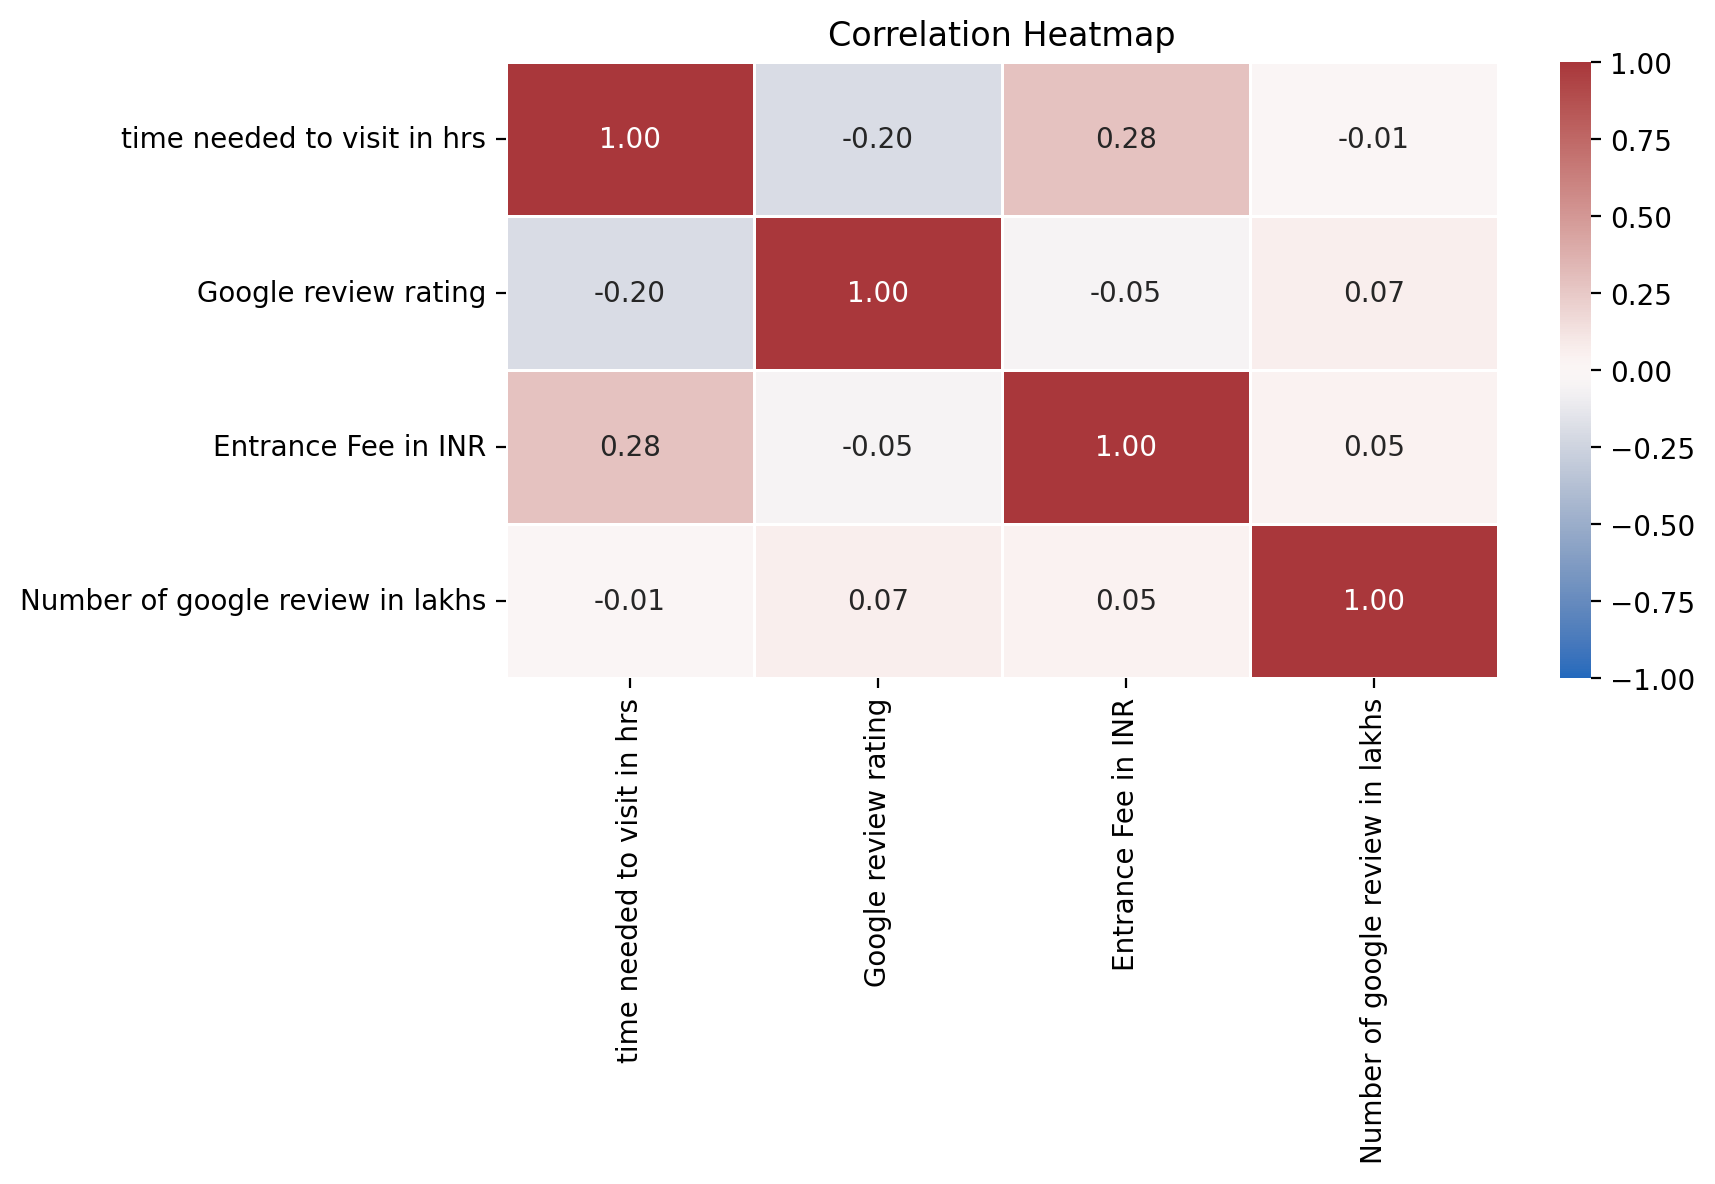

In [25]:
# correlation matrix
plt.figure(figsize = (8, 4), facecolor = "white")

# plotting
sns.heatmap(
    data = df_travel.corr(numeric_only = True),
    cmap = "vlag",
    vmin = -1, vmax = 1,
    linecolor = "white", linewidth = 0.5,
    annot = True,
    fmt = ".2f"
)

plt.title('Correlation Heatmap')
plt.show()

<Figure size 1600x800 with 0 Axes>

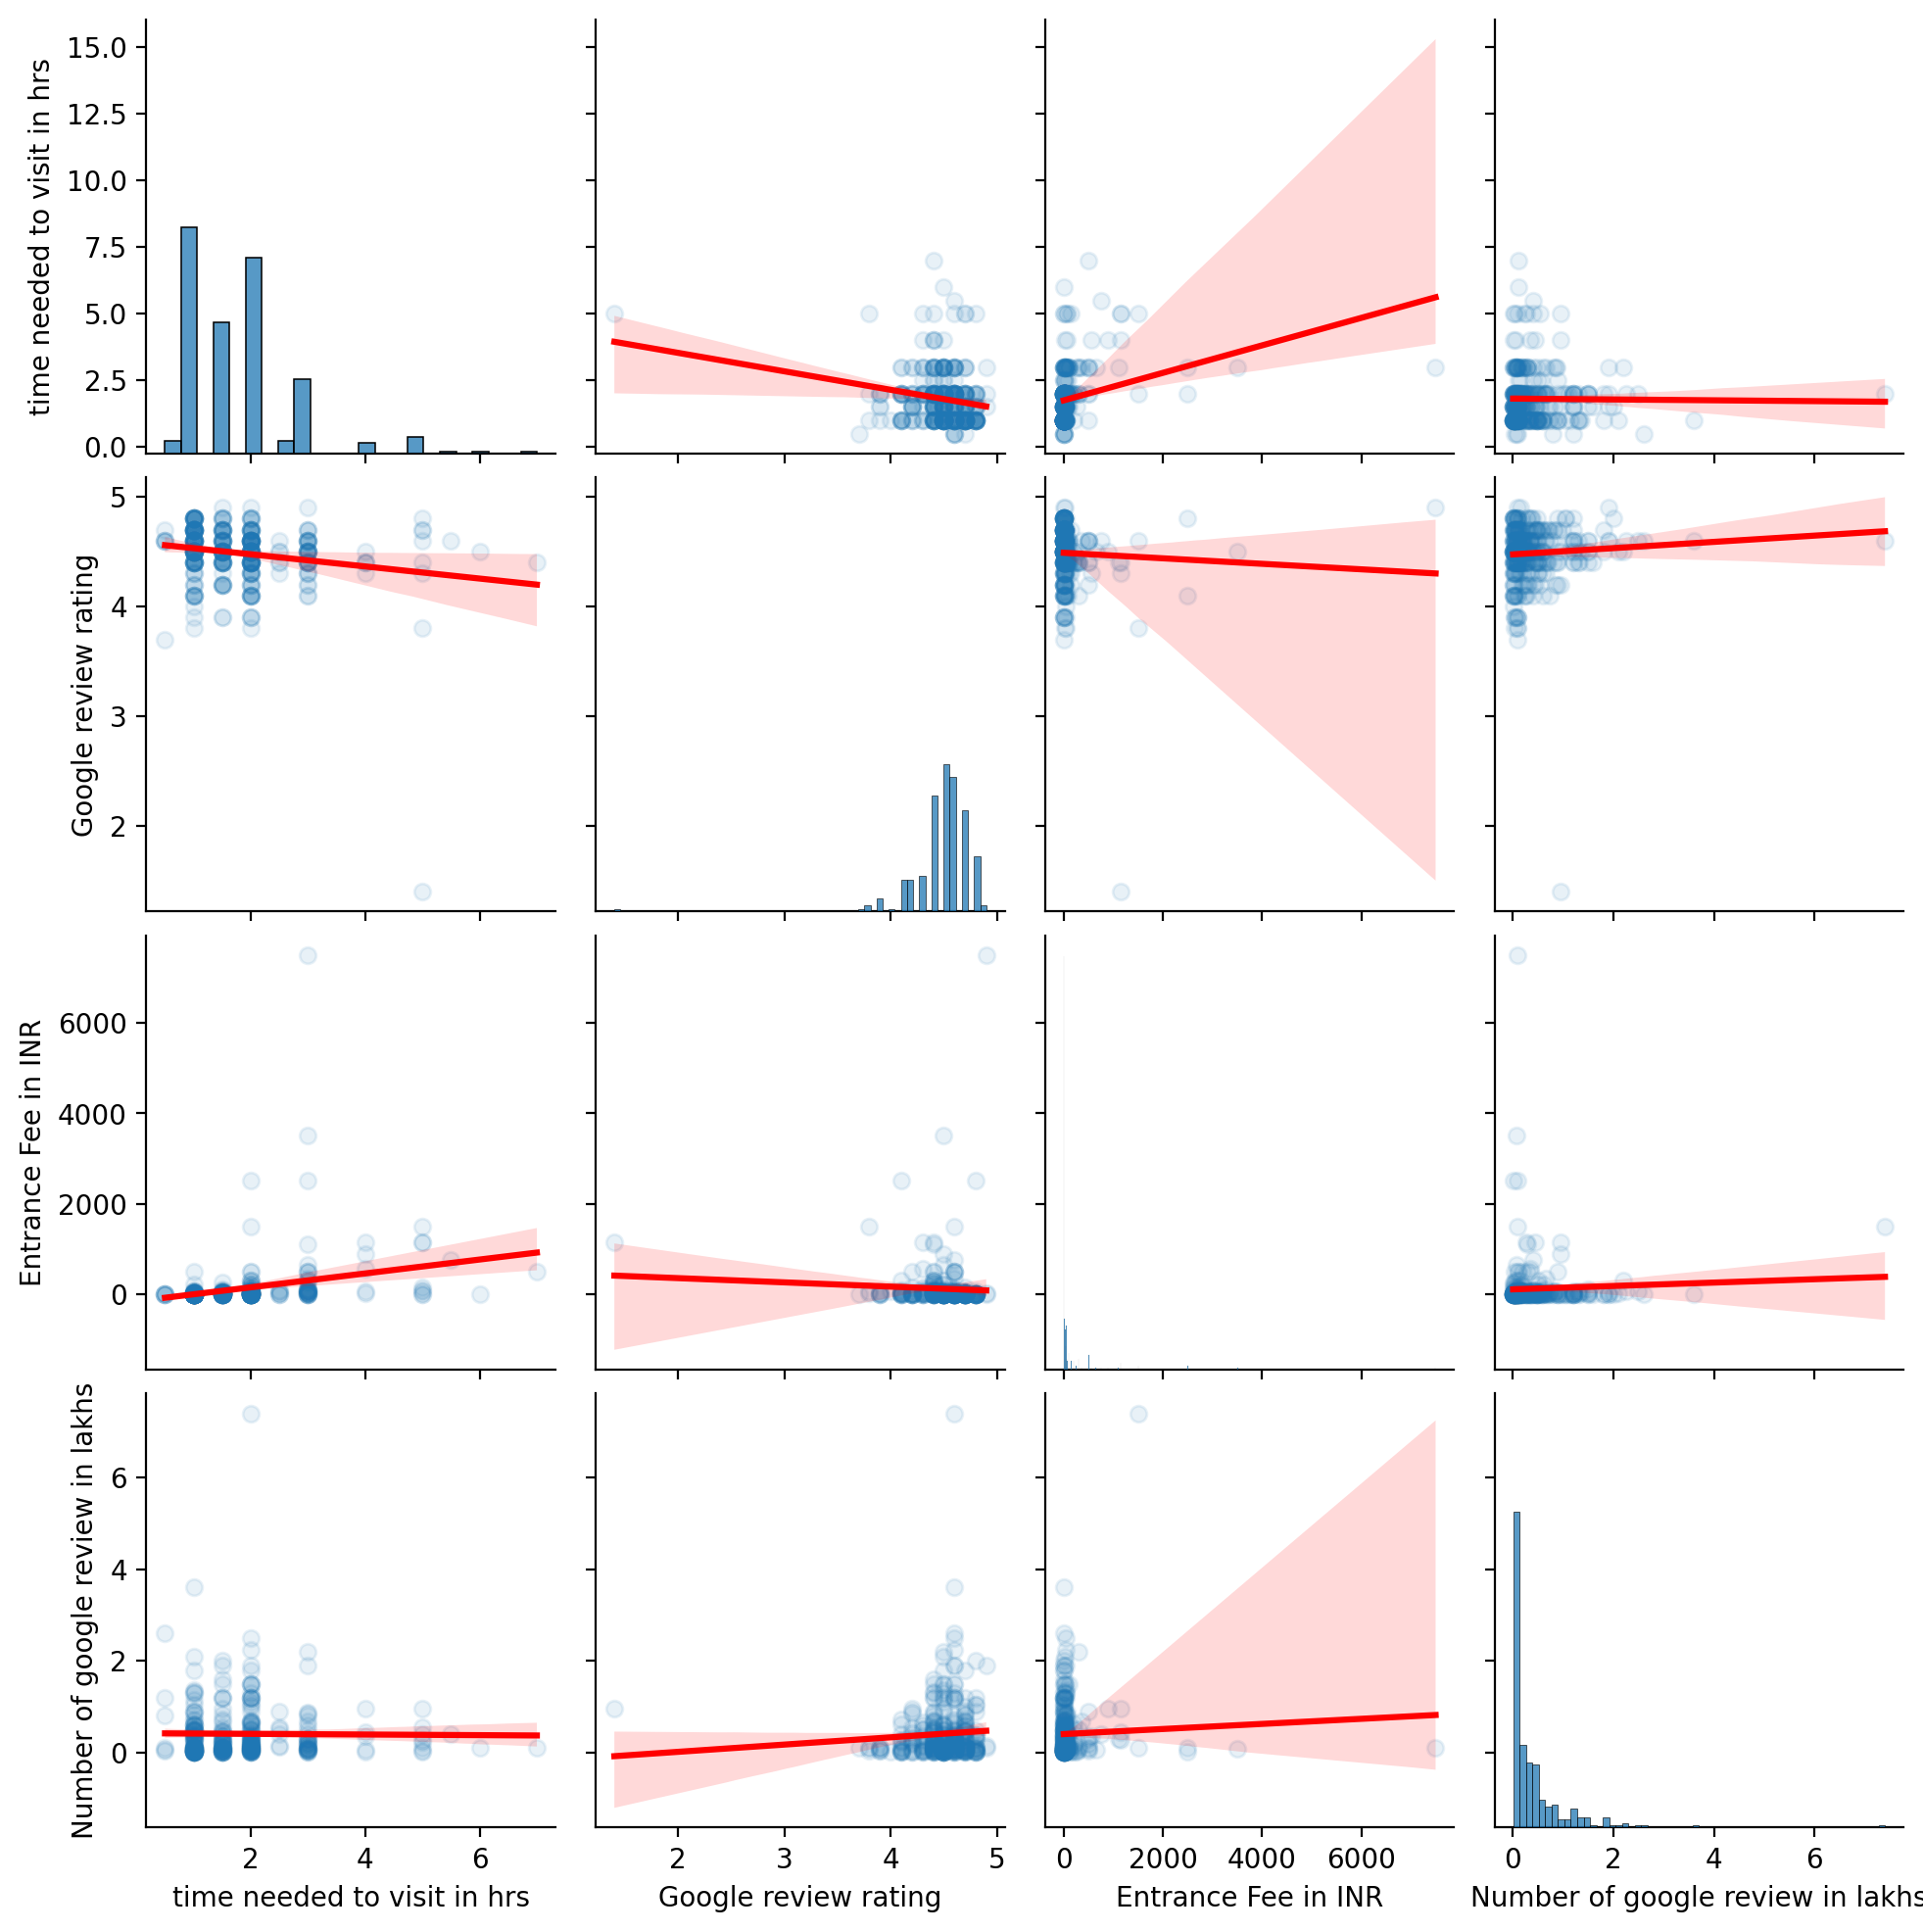

In [26]:
# pairplot
plt.figure(figsize = (8, 4), facecolor = "white")

# plotting
sns.pairplot(
    data = df_travel,
    kind = "reg", 
    plot_kws = {'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.1}},
    vars = [
        'time needed to visit in hrs', 'Google review rating', 
        'Entrance Fee in INR', 'Number of google review in lakhs'
    ]
)

plt.show()

# 5. Problem Discovery and Solution

Please feel free to comment for suggestions! Thank you :)